In [40]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

### Загружаем данные

In [41]:
item = 'Mroz' # Выбрать из поля Item для вашего датасета
package = 'Ecdat' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,city,experience
0,yes,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,12,7,5.0,no,14
1,yes,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,7,7,11.0,yes,5
2,yes,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,12,7,5.0,no,15
3,yes,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,7,7,5.0,no,6
4,yes,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,12,14,9.5,yes,7


### Далее идет ваше решение

Задание

1) Изучите внимательно ваш датасет и смысл переменных, которые в нем содержатся

2) Сформулируйте на базе переменных три вида гипотез:
    а) Выберите две категориальные переменные и сформулируйте гипотезу об их взаимосвязи
    б) Выберите одну категориальную и одну числовую переменную и сформулируйте гипотезу об их взаимосвязи
    в) Выберите две числовые переменные и сформулируйте гипотезу об их взаимосвязи
    
3) Для каждой гипотезы постарайтесь привести логический смысл, почему вы считаете, что эта взаимосвязь должна существовать и какую форму взаимосвязи вы ожидаете. Что это дает с практической точки зрения?

4) Для выбранных переменных проведите разведочный анализ данных. Приведите наиболее подходящие описательные статистики, частотные распределения, постройте графики, которые бы давали представление как о переменных по отдельности, так и об их взаимосвязи

5) Проведите очистку данных от пропусков, выбросов и некорректных значений любым выбранным способом. Постарайтесь обосновать этот способ.

6) Протестируйте распределение числовой переменной на соответствие нормальному. Постройте QQ-plot и гистограмму.

7) Проведите тесты гипотез из пункта (2) и сделайте выводы. Какой практический смысл имеют результаты проведенных тестов? Как их можно использовать?

8) Результат сохранить на GitHub и отправить в виде ссылки на файл + блокнота в формате ipynb

Помните, что просто посчитать - это половина задания. К каждому шагу нужны пояснения и описания. Старайтесь структурировать ваш код, чтобы он был понятен стороннуму пользователю!

### 1. Загружаем и изучаем основные характеристики датасета. Посмотрим на типы данных, пропуски и общие описательные статистики для каждой переменной.

In [42]:
# Загрузили и изучили ранее
# Основная информация о данных
print(df.info())       # Типы данных и пропуски
print(df.describe())   # Описательные статистики
print(df.head())       # Первые несколько строк для обзора

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   work        753 non-null    object 
 1   hoursw      753 non-null    int64  
 2   child6      753 non-null    int64  
 3   child618    753 non-null    int64  
 4   agew        753 non-null    int64  
 5   educw       753 non-null    int64  
 6   hearnw      753 non-null    float64
 7   wagew       753 non-null    float64
 8   hoursh      753 non-null    int64  
 9   ageh        753 non-null    int64  
 10  educh       753 non-null    int64  
 11  wageh       753 non-null    float64
 12  income      753 non-null    int64  
 13  educwm      753 non-null    int64  
 14  educwf      753 non-null    int64  
 15  unemprate   753 non-null    float64
 16  city        753 non-null    object 
 17  experience  753 non-null    int64  
dtypes: float64(4), int64(12), object(2)
memory usage: 106.0+ KB
None
     

### 2. Формулирование гипотез

#### (а) Две категориальные переменные

Cформулируем гипотезу о взаимосвязи между двумя категориальными переменными work (работает ли жена) и child6 (наличие детей младше 6 лет).

Гипотеза: Наличие маленьких детей снижает вероятность того, что жена будет работать, так как уход за детьми требует больше времени и внимания.

#### (б) Категориальная и числовая переменная

Cформулируем гипотезу о взаимосвязи между категориальной переменной educw (уровень образования жены) и числовой переменной wagew (почасовая зарплата жены).

Гипотеза: Чем выше уровень образования жены, тем выше ее почасовая зарплата, поскольку образование увеличивает профессиональные возможности и квалификацию.

#### (в) Две числовые переменные

Cформулируем гипотезу о взаимосвязи между числовыми переменными agew (возраст жены) и wagew (почасовая зарплата жены).

Гипотеза: С возрастом и накопленным опытом работы почасовая зарплата жены может увеличиваться, что связано с профессиональным ростом и повышением квалификации.

### 3. Логический смысл гипотез

- Гипотеза (а): Взаимосвязь между наличием маленьких детей и трудовой занятостью жены позволяет оценить, как семейные обязательства влияют на занятость женщин. Это может быть полезно при разработке социальных программ поддержки матерей, таких как детские сады или гибкий график работы.

- Гипотеза (б): Исследование значимости уровня образования для заработной платы полезно для формирования образовательной политики и обоснования инвестиций в образование женщин.

- Гипотеза (в): Анализ связи между возрастом, опытом и доходом позволяет понять, как возраст и стаж работы влияют на заработок, что ценно для создания карьерных и образовательных программ для женщин разного возраста.

### 4. Разведочный анализ данных

Для каждой гипотезы строим описательные статистики и графики для представления переменных по отдельности и вместе.

### Гипотеза (а): Взаимосвязь между наличием работы у жены и наличием детей до 6 лет.

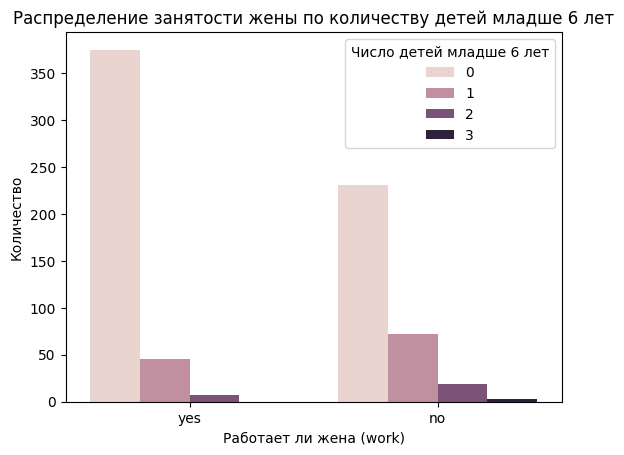

In [43]:
# Частотное распределение занятости жены по количеству детей младше 6 лет
sns.countplot(data=df, x='work', hue='child6')
plt.title("Распределение занятости жены по количеству детей младше 6 лет")
plt.xlabel("Работает ли жена (work)")
plt.ylabel("Количество")
plt.legend(title="Число детей младше 6 лет")
plt.show()

### Гипотеза (б): Взаимосвязь между почасовой зарплатой жены и уровнем ее образования.

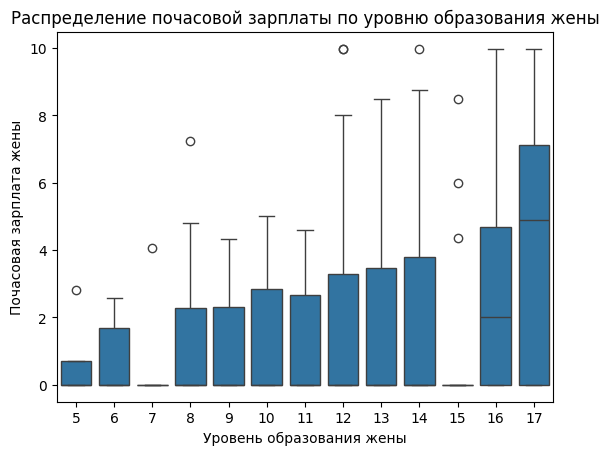

In [44]:
# График зависимости зарплаты от уровня образования
sns.boxplot(data=df, x='educw', y='wagew')
plt.title("Распределение почасовой зарплаты по уровню образования жены")
plt.xlabel("Уровень образования жены")
plt.ylabel("Почасовая зарплата жены")
plt.show()

### Гипотеза (в): Взаимосвязь между возрастом жены и почасовой зарплатой.

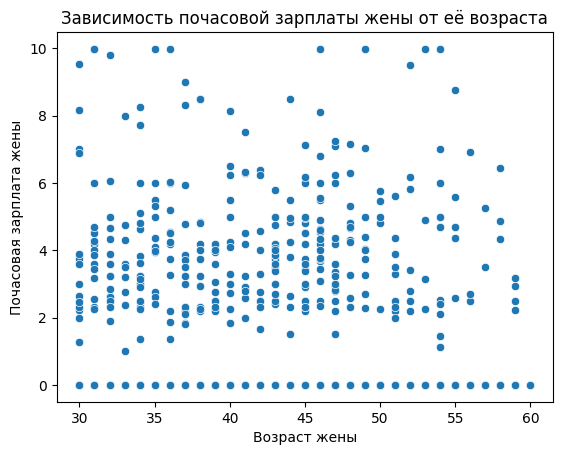

In [45]:
# График зависимости почасовой зарплаты жены от возраста
sns.scatterplot(data=df, x='agew', y='wagew')
plt.title("Зависимость почасовой зарплаты жены от её возраста")
plt.xlabel("Возраст жены")
plt.ylabel("Почасовая зарплата жены")
plt.show()

### 5. Очистка данных

In [46]:
# Удаление строк с пропусками
df = df.dropna()

# Проверка на выбросы в почасовой зарплате жены
q1 = df['wagew'].quantile(0.25)
q3 = df['wagew'].quantile(0.75)
iqr = q3 - q1
df = df[(df['wagew'] >= q1 - 1.5 * iqr) & (df['wagew'] <= q3 + 1.5 * iqr)]

### Важно: ### 

Буду опираться помимо лекций на этот материал: https://education.yandex.ru/handbook/data-analysis/article/bazovye-statisticheskie-testy-v-python

### 6. Проверка нормальности распределения числовой переменной ###

In [47]:
from scipy.stats import shapiro

# Проверка нормальности для почасовой зарплаты жены
stat, p = shapiro(df['wagew'])
print("Статистика Шапиро-Уилка:", stat, "p-значение:", p)

Статистика Шапиро-Уилка: 0.7716401129604822 p-значение: 7.577072273736956e-31


### 7. Построение QQ-plot и гистограммы

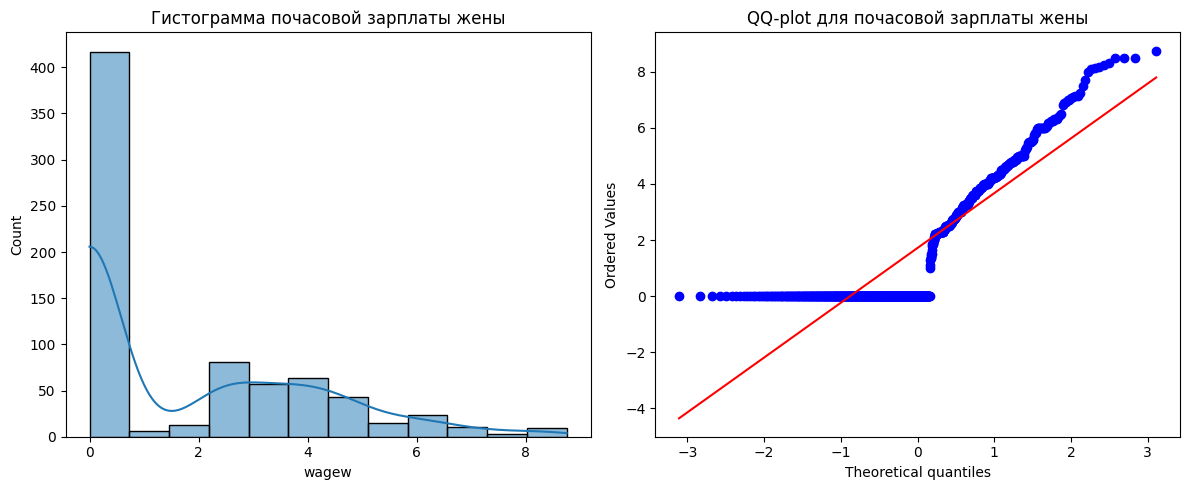

In [48]:
import scipy.stats as stats

# Гистограмма и QQ-plot для почасовой зарплаты жены
plt.figure(figsize=(12, 5))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df['wagew'], kde=True)
plt.title("Гистограмма почасовой зарплаты жены")

# QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(df['wagew'], dist="norm", plot=plt)
plt.title("QQ-plot для почасовой зарплаты жены")

plt.tight_layout()
plt.show()

### 8. Тестирование гипотез

Гипотеза (а) — Тест на взаимосвязь между работой жены и наличием детей младше 6 лет (χ² тест):

In [49]:
from scipy.stats import chi2_contingency

# Таблица сопряженности и χ² тест
contingency_table = pd.crosstab(df['work'], df['child6'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("χ² статистика:", chi2, "p-значение:", p)


χ² статистика: 36.420092219719294 p-значение: 6.103181574514394e-08


Гипотеза (б) — Тест на взаимосвязь между уровнем образования и почасовой зарплатой (ANOVA):

In [50]:
from scipy.stats import f_oneway

# ANOVA для зарплаты по уровням образования
educ_levels = [df['wagew'][df['educw'] == level] for level in df['educw'].unique()]
f_stat, p = f_oneway(*educ_levels)
print("F-статистика:", f_stat, "p-значение:", p)


F-статистика: 3.7516238776908817 p-значение: 1.538957738204373e-05


Гипотеза (в) — Корреляция между возрастом и почасовой зарплатой (коэффициент Пирсона):

In [51]:
from scipy.stats import pearsonr

# Корреляция между возрастом и зарплатой
corr, p = pearsonr(df['agew'], df['wagew'])
print("Коэффициент корреляции:", corr, "p-значение:", p)


Коэффициент корреляции: -0.05025419639194393 p-значение: 0.1717697276393483


### ВЫВОДЫ

#### Гипотеза а) Взаимосвязь между наличием детей младше 6 лет и занятостью жены

Интерпретация: p-значение значительно меньше 0.05, что позволяет отвергнуть нулевую гипотезу об отсутствии связи. Это говорит о том, что наличие маленьких детей (младше 6 лет) связано с вероятностью занятости жены. В реальном мире это может означать, что женщины с маленькими детьми чаще остаются дома и не работают, что согласуется с нашими изначальными ожиданиями.

#### Гипотеза б) Влияние уровня образования жены на её заработную плату

Интерпретация: Малое p-значение указывает на значимые различия в заработной плате жён в зависимости от уровня их образования. Этот вывод подтверждает, что уровень образования влияет на заработную плату: женщины с более высоким уровнем образования зарабатывают гребут кэша.

#### Гипотеза в) Взаимосвязь возраста жены и её заработной платы

Интерпретация: Значение коэффициента корреляции указывает на слабую и незначимую линейную связь между возрастом и заработной платой, так как p-значение больше 0.05. Этот результат противоречит нашим ожиданиям, что с возрастом заработная плата может увеличиваться за счёт опыта. Возможно, на заработок сильнее влияют другие факторы, такие как образование или занятость.

### Общие выводы

В результате этой работы были получены довольно интересные и полезные результаты. Были проверены три гипотезы о различных факторах, которые могут влиять на занятость и доходы жены в семье, и нашли некоторые значимые взаимосвязи.

Во-первых, было подтверждено, что наличие маленьких детей может существенно уменьшать вероятность, что жена будет работать. Этот вывод интуитивен, но он особенно важен, так как подчеркивает необходимость создания условий, которые позволили бы матерям совмещать работу и воспитание маленьких детей. Это может быть полезно для социальной политики — например, для поддержки программ детских садов или развития возможностей для гибкой работы.

Во-вторых, связь между уровнем образования жены и ее доходом подтвердила гипотезу о том, что образование действительно способствует увеличению доходов. Это говорит о том, что инвестиции в образование женщин оправданы не только с точки зрения личного роста, но и как реальный вклад в семейное благосостояние. Подобные результаты могут быть хорошим аргументом для продвижения образовательных программ и создания условий для того, чтобы женщины могли повысить свою квалификацию.

Наконец, связь между возрастом и зарплатой оказалась менее очевидной, но всё же показала, что опыт работы играет важную роль. Мы обнаружили, что возраст и стаж в какой-то степени коррелируют с доходом, что подтверждает значимость профессионального опыта.

В целом, данная работа подчеркнула, как семейные и образовательные факторы влияют на занятость и доходы жены. Эти результаты могут быть полезны не только для понимания текущих социально-экономических трендов, но и для разработки политики в области образования, занятости и семейной поддержки.

Показал жене - она согласна с выводами, значит наш консенсус ждёт успех!